## PROTEUS2 protein secondary structure analysis:

### This is a notebook to combine and evaluate the protein secondary structure output for all algae rot proteomics samples

### Output means:

- H = Helix
- E = Beta Strand
- C = Coil
- T = Membrane helix
- B = Membrane strand
- S = Signal peptide
- c = Cleavage site

In [18]:
cd /home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/

/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2


In [19]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [21]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_322_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_322_prot_trypsin_totals")
PeaksDB_323_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_323_prot_trypsin_totals")
PeaksDB_324_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_324_prot_trypsin_totals")
PeaksDB_325_tryp = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_325_prot_trypsin_totals")

frames = [PeaksDB_322_tryp, PeaksDB_323_tryp, PeaksDB_324_tryp, PeaksDB_325_tryp]

index = ['PeaksDB_322_tryp', 'PeaksDB_323_tryp', 'PeaksDB_324_tryp', 'PeaksDB_325_tryp']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)


# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']

# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_total['% coil'] = PeaksDB_Proteus_total['% coil']*100
PeaksDB_Proteus_total['% helix'] = PeaksDB_Proteus_total['% helix']*100
PeaksDB_Proteus_total['% beta strand'] = PeaksDB_Proteus_total['% beta strand']*100
PeaksDB_Proteus_total['% membrane helix'] = PeaksDB_Proteus_total['% membrane helix']*100
PeaksDB_Proteus_total['% membrane beta strand'] = PeaksDB_Proteus_total['% membrane beta strand']*100
PeaksDB_Proteus_total['% signal peptide'] = PeaksDB_Proteus_total['% signal peptide']*100
PeaksDB_Proteus_total['% cleavage site'] = PeaksDB_Proteus_total['% cleavage site']*100


PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']


PeaksDB_Proteus_trypsin = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])

PeaksDB_Proteus_trypsin.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,54.527328,26.376233,15.021523,3.631775,0.443142,0.0,0.0
1,T2,56.189261,26.533383,14.418915,2.262583,0.595858,0.0,0.0
2,T5,53.307081,23.440002,11.694695,11.005082,0.553140,0.0,0.0
3,T12,56.752497,22.811483,9.982389,9.276020,1.177611,0.0,0.0


In [22]:
# For each of the algae rot samples, read in Proteus2 overall %'s csvs and combine

PeaksDB_329_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_329_prot_undigested_totals")
PeaksDB_330_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_330_prot_undigested_totals")
PeaksDB_331_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_331_prot_undigested_totals")
PeaksDB_332_undig = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/PeaksDB_332_prot_undigested_totals")

frames = [PeaksDB_329_undig, PeaksDB_330_undig, PeaksDB_331_undig, PeaksDB_332_undig]

index = ['PeaksDB_329_undig', 'PeaksDB_330_undig', 'PeaksDB_331_undig', 'PeaksDB_332_undig']

# concatenate dataframes

PeaksDB_Proteus_total = pd.concat(frames, sort=False, ignore_index=True)

# delete useless columns

del PeaksDB_Proteus_total['% C total']
del PeaksDB_Proteus_total['% H total']
del PeaksDB_Proteus_total['% E total']
del PeaksDB_Proteus_total['% T total']
del PeaksDB_Proteus_total['% B total']
del PeaksDB_Proteus_total['% S total']
del PeaksDB_Proteus_total['% c total']
del PeaksDB_Proteus_total['% check sum']
del PeaksDB_Proteus_total['overall % sum']


# rename columns

PeaksDB_Proteus_total.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_total['% coil'] = PeaksDB_Proteus_total['% coil']*100
PeaksDB_Proteus_total['% helix'] = PeaksDB_Proteus_total['% helix']*100
PeaksDB_Proteus_total['% beta strand'] = PeaksDB_Proteus_total['% beta strand']*100
PeaksDB_Proteus_total['% membrane helix'] = PeaksDB_Proteus_total['% membrane helix']*100
PeaksDB_Proteus_total['% membrane beta strand'] = PeaksDB_Proteus_total['% membrane beta strand']*100
PeaksDB_Proteus_total['% signal peptide'] = PeaksDB_Proteus_total['% signal peptide']*100
PeaksDB_Proteus_total['% cleavage site'] = PeaksDB_Proteus_total['% cleavage site']*100

PeaksDB_Proteus_total['Timepoint']= ['T0', 'T2', 'T5', 'T12']

del PeaksDB_Proteus_total['sample']

PeaksDB_Proteus_undig = PeaksDB_Proteus_total.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])


PeaksDB_Proteus_undig.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0,50.253661,30.266127,14.880274,3.990969,0.608969,0.000000,0.000000
1,T2,45.437619,31.141341,15.065697,5.911941,0.627499,1.795519,0.020383
2,T5,48.198365,26.425044,15.080293,9.874841,0.013074,0.039223,0.369160
3,T12,46.174222,31.028089,9.601973,13.195717,0.000000,0.000000,0.000000


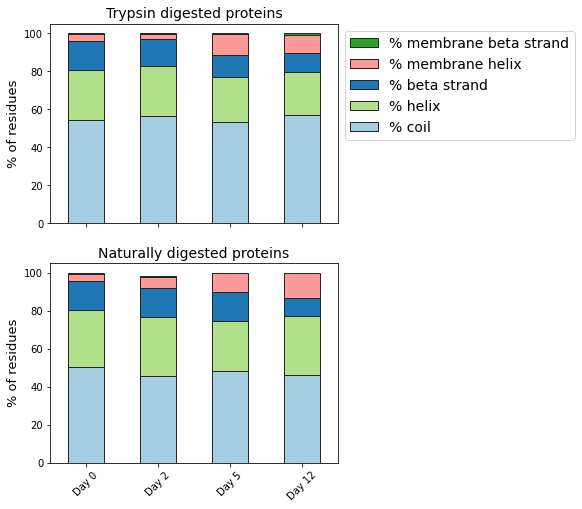

In [23]:
# plot secondary structure predictions

colors = '#d73027', '#fc8d59', '#fee090', '#91cf60', '#e0f3f8', '#91bfdb', '#4575b4'

colors2 = '#a6cee3', '#b2df8a', '#1f78b4', '#fb9a99', '#33a02c'

fig, axes = plt.subplots(figsize=(5, 7),nrows=2, ncols=1)
plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.1, right=None, top=None, wspace= 0.9, hspace= 0.20)

PeaksDB_Proteus_trypsin.plot(ax=axes[0], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                             color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_undig.plot(ax=axes[1], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                           color = colors2, edgecolor = '#252525')

axes[0].set_title('Trypsin digested proteins', fontsize = 14)
axes[0].set_ylabel("% of residues", fontsize = 13)
#axes[0].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)
axes[0].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1].set_title('Naturally digested proteins', fontsize = 14)
axes[1].set_ylabel("% of residues", fontsize = 13)
axes[1].get_legend().remove()
axes[1].set_xticklabels(('Day 0', 'Day 2','Day 5', 'Day 12'), rotation = 45)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)

plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/fig3-proteus.png', dpi=400)

## Plots of just cytoplasm and chloroplast/membrane proteins:

In [24]:
# For the just diatom cytoplasm proteins, read in Proteus2 overall %'s csvs and combine

PeaksDB_322_dig_cyt = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_322 PeaksDB_dia_cyt_prot_trypsin_totals")
PeaksDB_323_dig_cyt = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_323 PeaksDB_dia_cyt_prot_trypsin_totals")
PeaksDB_324_dig_cyt = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_324 PeaksDB_dia_cyt_prot_trypsin_totals")
PeaksDB_325_dig_cyt = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day12_325 PeaksDB_dia_cyt_prot_trypsin_totals")


frames = [PeaksDB_322_dig_cyt, PeaksDB_323_dig_cyt, PeaksDB_324_dig_cyt, PeaksDB_325_dig_cyt]

index = ['PeaksDB_322_dig_cyt', 'PeaksDB_323_dig_cyt', 'PeaksDB_324_dig_cyt', 'PeaksDB_325_dig_cyt']

# concatenate dataframes

PeaksDB_Proteus_cytoplasm = pd.concat(frames, sort=False, ignore_index=True)

# delete useless columns

del PeaksDB_Proteus_cytoplasm['% C total']
del PeaksDB_Proteus_cytoplasm['% H total']
del PeaksDB_Proteus_cytoplasm['% E total']
del PeaksDB_Proteus_cytoplasm['% T total']
del PeaksDB_Proteus_cytoplasm['% B total']
del PeaksDB_Proteus_cytoplasm['% S total']
del PeaksDB_Proteus_cytoplasm['% c total']
del PeaksDB_Proteus_cytoplasm['% check sum']
del PeaksDB_Proteus_cytoplasm['overall % sum']


# rename columns

PeaksDB_Proteus_cytoplasm.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_cytoplasm['% coil'] = PeaksDB_Proteus_cytoplasm['% coil']*100
PeaksDB_Proteus_cytoplasm['% helix'] = PeaksDB_Proteus_cytoplasm['% helix']*100
PeaksDB_Proteus_cytoplasm['% beta strand'] = PeaksDB_Proteus_cytoplasm['% beta strand']*100
PeaksDB_Proteus_cytoplasm['% membrane helix'] = PeaksDB_Proteus_cytoplasm['% membrane helix']*100
PeaksDB_Proteus_cytoplasm['% membrane beta strand'] = PeaksDB_Proteus_cytoplasm['% membrane beta strand']*100
PeaksDB_Proteus_cytoplasm['% signal peptide'] = PeaksDB_Proteus_cytoplasm['% signal peptide']*100
PeaksDB_Proteus_cytoplasm['% cleavage site'] = PeaksDB_Proteus_cytoplasm['% cleavage site']*100


PeaksDB_Proteus_cytoplasm['Timepoint']= ['T0 cytoplasm', 'T2 cytoplasm', 'T5 cytoplasm', 'T12 cytoplasm']

del PeaksDB_Proteus_cytoplasm['sample']

PeaksDB_Proteus_cyt = PeaksDB_Proteus_cytoplasm.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])


PeaksDB_Proteus_cyt.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0 cytoplasm,48.288960,23.802891,27.032236,0.875912,0.0,0.0,0.0
1,T2 cytoplasm,41.979712,36.018120,22.002168,0.000000,0.0,0.0,0.0
2,T5 cytoplasm,42.448475,34.808469,22.743056,0.000000,0.0,0.0,0.0
3,T12 cytoplasm,40.620712,33.072837,26.306452,0.000000,0.0,0.0,0.0


In [25]:
# For the just diatom membrane proteins, read in Proteus2 overall %'s csvs and combine

PeaksDB_322_dig_mem = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_322 PeaksDB_dia_mem_prot_trypsin_totals")
PeaksDB_323_dig_mem = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_323 PeaksDB_dia_mem_prot_trypsin_totals")
PeaksDB_324_dig_mem = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day0_324 PeaksDB_dia_mem_prot_trypsin_totals")
PeaksDB_325_dig_mem = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/proteus2/Proteins-Proteus2/Day12_325 PeaksDB_dia_mem_prot_trypsin_totals")


frames = [PeaksDB_322_dig_mem, PeaksDB_323_dig_mem, PeaksDB_324_dig_mem, PeaksDB_325_dig_mem]

index = ['PeaksDB_322_dig_mem', 'PeaksDB_323_dig_mem', 'PeaksDB_324_dig_mem', 'PeaksDB_325_dig_mem']

# concatenate dataframes

PeaksDB_Proteus_membrane = pd.concat(frames, sort=False, ignore_index=True)

# delete useless columns

del PeaksDB_Proteus_membrane['% C total']
del PeaksDB_Proteus_membrane['% H total']
del PeaksDB_Proteus_membrane['% E total']
del PeaksDB_Proteus_membrane['% T total']
del PeaksDB_Proteus_membrane['% B total']
del PeaksDB_Proteus_membrane['% S total']
del PeaksDB_Proteus_membrane['% c total']
del PeaksDB_Proteus_membrane['% check sum']
del PeaksDB_Proteus_membrane['overall % sum']


# rename columns

PeaksDB_Proteus_membrane.columns = ['sample', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site']

# Go from faction space to percentages

PeaksDB_Proteus_membrane['% coil'] = PeaksDB_Proteus_membrane['% coil']*100
PeaksDB_Proteus_membrane['% helix'] = PeaksDB_Proteus_membrane['% helix']*100
PeaksDB_Proteus_membrane['% beta strand'] = PeaksDB_Proteus_membrane['% beta strand']*100
PeaksDB_Proteus_membrane['% membrane helix'] = PeaksDB_Proteus_membrane['% membrane helix']*100
PeaksDB_Proteus_membrane['% membrane beta strand'] = PeaksDB_Proteus_membrane['% membrane beta strand']*100
PeaksDB_Proteus_membrane['% signal peptide'] = PeaksDB_Proteus_membrane['% signal peptide']*100
PeaksDB_Proteus_membrane['% cleavage site'] = PeaksDB_Proteus_membrane['% cleavage site']*100


PeaksDB_Proteus_membrane['Timepoint']= ['T0 membrane', 'T2 membrane', 'T5 membrane', 'T12 membrane']

del PeaksDB_Proteus_membrane['sample']

PeaksDB_Proteus_mem = PeaksDB_Proteus_membrane.reindex(columns= ['Timepoint', '% coil', '% helix', '% beta strand', \
                                 '% membrane helix', '% membrane beta strand', '% signal peptide', '% cleavage site'])


PeaksDB_Proteus_mem.head(8)

,Timepoint,% coil,% helix,% beta strand,% membrane helix,% membrane beta strand,% signal peptide,% cleavage site
0,T0 membrane,45.474220,28.948489,12.189300,13.387991,0.0,0.0,0.0
1,T2 membrane,49.290798,29.827521,15.737473,5.144208,0.0,0.0,0.0
2,T5 membrane,47.341631,25.862040,11.215094,15.581236,0.0,0.0,0.0
3,T12 membrane,50.749375,36.293645,3.022391,9.934588,0.0,0.0,0.0


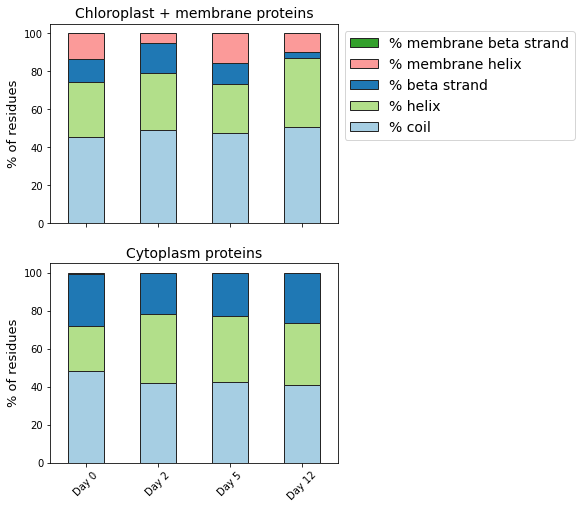

In [26]:
# plot secondary structure predictions

colors = '#d73027', '#fc8d59', '#fee090', '#91cf60', '#e0f3f8', '#91bfdb', '#4575b4'

colors2 = '#a6cee3', '#b2df8a', '#1f78b4', '#fb9a99', '#33a02c'

fig, axes = plt.subplots(figsize=(5, 7),nrows=2, ncols=1)
plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.1, right=None, top=None, wspace= 0.9, hspace= 0.20)

PeaksDB_Proteus_mem.plot(ax=axes[0], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                             color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_cyt.plot(ax=axes[1], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                           color = colors2, edgecolor = '#252525')

axes[0].set_title('Chloroplast + membrane proteins', fontsize = 14)
axes[0].set_ylabel("% of residues", fontsize = 13)
#axes[0].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)
axes[0].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1].set_title('Cytoplasm proteins', fontsize = 14)
axes[1].set_ylabel("% of residues", fontsize = 13)
axes[1].get_legend().remove()
axes[1].set_xticklabels(('Day 0', 'Day 2', 'Day 5', 'Day 12'), rotation = 45)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)

plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/fig3b-proteus.png', dpi=400)

### PLOT EVERTHING TOGETHER

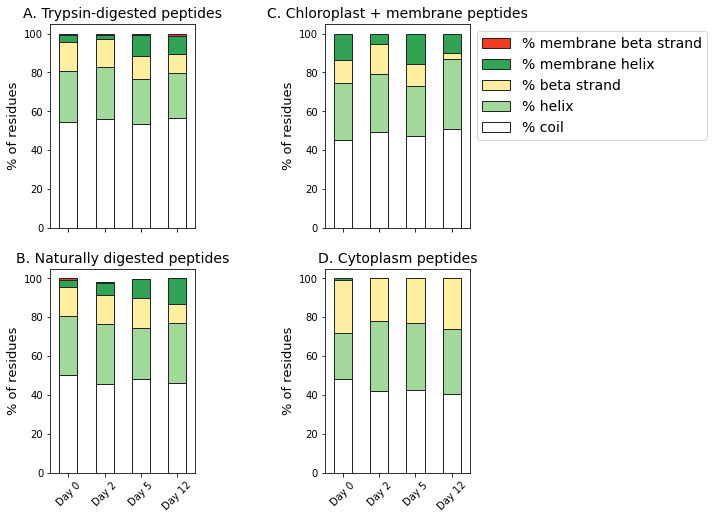

In [28]:
# plot secondary structure predictions

colors = '#d73027', '#fc8d59', '#fee090', '#91cf60', '#e0f3f8', '#91bfdb', '#4575b4'

colors2 = 'white', '#a1d99b', '#ffeda0', '#31a354', '#f03b20'

fig, axes = plt.subplots(figsize=(7, 7),nrows=2, ncols=2)
plt.tight_layout(pad = 0.1)

plt.subplots_adjust(left=0.15, bottom=0.1, right=None, top=None, wspace= 0.9, hspace= 0.20)

PeaksDB_Proteus_trypsin.plot(ax=axes[0,0], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                             color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_undig.plot(ax=axes[1,0], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                           color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_mem.plot(ax=axes[0,1], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                             color = colors2, edgecolor = '#252525')

PeaksDB_Proteus_cyt.plot(ax=axes[1,1], y = ['% coil', '% helix', '% beta strand', '% membrane helix', \
                                               '% membrane beta strand'], kind='bar', stacked=True, \
                           color = colors2, edgecolor = '#252525')

axes[0,0].set_title('A. Trypsin-digested peptides', fontsize = 14)
axes[0,0].set_ylabel("% of residues", fontsize = 13)
axes[0,0].get_legend().remove()
axes[0,0].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1,0].set_title('B. Naturally digested peptides', fontsize = 14)
axes[1,0].set_ylabel("% of residues", fontsize = 13)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(('Day 0', 'Day 2','Day 5', 'Day 12'), rotation = 45)

axes[0,1].set_title('C. Chloroplast + membrane peptides', fontsize = 14)
axes[0,1].set_ylabel("% of residues", fontsize = 13)
axes[0,1].set_xticklabels( ('', '','', ''), rotation = 45)

axes[1,1].set_title('D. Cytoplasm peptides', fontsize = 14)
axes[1,1].set_ylabel("% of residues", fontsize = 13)
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(('Day 0', 'Day 2', 'Day 5', 'Day 12'), rotation = 45)

handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 14)

plt.savefig('/home/millieginty/Documents/git-repos/rot-mayer/figures/manuscript-files/fig3-proteus.png', bbox_inches='tight', dpi=400)